In [17]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
from fvhoe.visualization import plot_2d_slice, sample_circular_average
import matplotlib.pyplot as plt
import numpy as np
from sedov import sedov_rduP

In [2]:
# sedov blast params
t = 0.7
gamma = 1.4

In [3]:
# numerical solution
N = 32
p = 1

solver = EulerSolver(
    w0=partial(sedov, dims="xyz", mode="center"),
    conservative_ic=True,
    fv_ic=True,
    gamma=gamma,
    bc=BoundaryCondition(
        x=("reflective", "outflow"),
        y=("reflective", "outflow"),
        z=("reflective", "outflow"),
    ),
    CFL=0.8,
    x=(-1, 1),
    y=(-1, 1),
    z=(-1, 1),
    nx=N,
    ny=N,
    nz=N,
    px=p,
    py=p,
    pz=p,
    riemann_solver="llf",
    a_posteriori_slope_limiting=True,
    force_trouble=True,
    slope_limiter="minmod",
    NAD=1e-3,
    all_floors=True,
    snapshots_as_fv_averages=False,
    cupy=True,
)
solver.rkorder(t)

100%|██████████| 0.7/0.7 [00:15]                  


In [4]:
# analytical solution
r, d, u, P = sedov_rduP(t=t, dim=3, gamma=gamma)

chi0=1.032758805392732


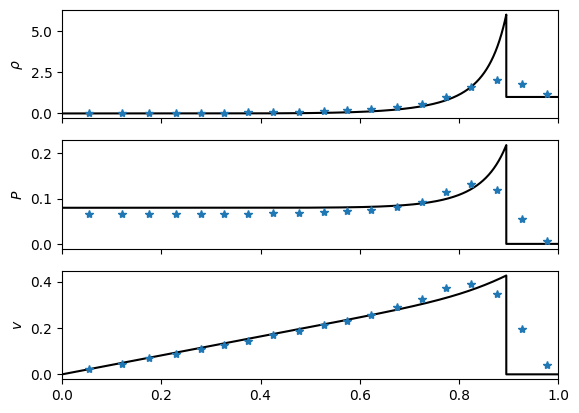

In [5]:
fig, ax = plt.subplots(3, 1, sharex=True)

# plot analytical solution
ax[0].set_ylabel(r"$\rho$")
ax[0].plot(r, d, "k")
ax[1].set_ylabel(r"$P$")
ax[1].plot(r, P, "k")
ax[2].set_ylabel(r"$v$")
ax[2].plot(r, u, "k")
ax[2].set_xlim(0, 1)

# sample numerical solution
radii = np.linspace(0, 1, 21)
avg_rho, avg_r = sample_circular_average(
    solver, param="rho", center=(0, 0, 0), radii=radii
)
avg_P, _ = sample_circular_average(solver, param="P", center=(0, 0, 0), radii=radii)
avg_v, _ = sample_circular_average(solver, param="v", center=(0, 0, 0), radii=radii)
ax[0].plot(avg_r, avg_rho, linestyle="none", marker="*")
ax[1].plot(avg_r, avg_P, linestyle="none", marker="*")
ax[2].plot(avg_r, avg_v, linestyle="none", marker="*")

t=0.7, x=[-0.96875, 0.96875], y=[-0.96875, 0.96875], z=-0.03125
horizontal_axis='x', vertical_axis='y'


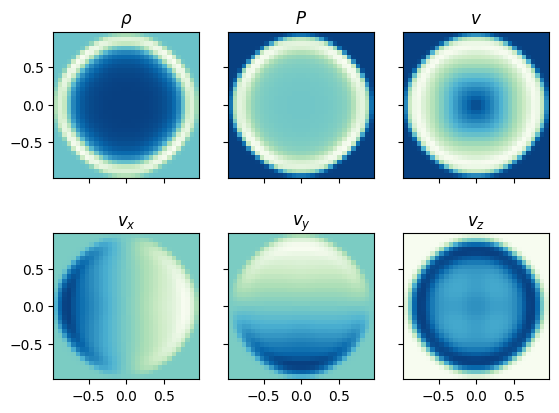

In [6]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

indexing = dict(z=0, t=t)

# density
ax[0, 0].set_title(r"$\rho$")
solver.plot_2d_slice(ax[0, 0], param="rho", **indexing)

# pressure
ax[0, 1].set_title(r"$P$")
solver.plot_2d_slice(ax[0, 1], param="P", verbose=False, **indexing)

# velocity magnitude
ax[0, 2].set_title(r"$v$")
solver.plot_2d_slice(ax[0, 2], param="v", verbose=False, **indexing)

# velocity components
ax[1, 0].set_title(r"$v_x$")
solver.plot_2d_slice(ax[1, 0], param="vx", verbose=False, **indexing)

ax[1, 1].set_title(r"$v_y$")
solver.plot_2d_slice(ax[1, 1], param="vy", verbose=False, **indexing)

ax[1, 2].set_title(r"$v_z$")
solver.plot_2d_slice(ax[1, 2], param="vz", verbose=False, **indexing)

In [7]:
# pressure asymmetry
P = solver.snapshots[-1]["w"].P
print(f"symmetry l1 err : {np.mean(np.abs(P - np.transpose(P, (2, 1, 0))))}")

symmetry l1 err : 8.096069226249125e-18
